# Анализ авиаперелетов

«F9» российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. В рамках исследования предпочтений пользователей, покупающих билеты на те или иные направления, нам необходимо изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. Представлены данные об аэропортах, самолётах, билетах и фестивалях. С помощью инструментов SQL была проанализирована гипотеза, что количество рейсов во время фестивалей увеличивается, однако подтверждения она не получила. С помощью Python мы исследуем связь между моделями самолетов, городами назначения и количеством рейсов, с целью определить какие факторы влияют на популярность направлений.

**Этапы исследования:**

1. Обзор данных
2. Определение топ-10 городов с наибольшим количеством рейсов
3. Анализ связи между моделями самолетов и количеством рейсов
4. Анализ связи между городами и количеством рейсов
5. Анализ топ-10 городов по количеству прибывающих рейсов
6. Вывод

<a name="h1"></a>
### 1. Обзор данных

#### Импорт библиотек

In [1]:
#импорт библиотеки pandas
import pandas as pd

#импорт библиотеки numpy
import numpy as np

#импорт библиотеки matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

#импорт библиотеки seaborn
import seaborn as sns

#### Настройка

In [2]:
#отображение данных до двух знаков после запятой
pd.set_option('display.precision', 2)

#### Анализ файлов

Для изучения общей информации анализируемых данных, воспользуемся стандартным набором функций: *head(), info(), describe()*.

##### Модели самолетов и количество рейсов

In [3]:
#чтение файла
df1 = pd.read_csv('/datasets/query_1.csv')

In [4]:
#вывод строк
df1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [5]:
#общая информация
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
#статистические показатели
df1.describe()

,flights_amount
count,8.00
mean,2035.62
std,1965.20
min,300.00
25%,605.25
50%,795.00
75%,4250.25
max,4557.00


**Вывод**  

Представлена информация о количестве рейсов на 8 моделях самолетов в сентябре 2018, в т.ч. трех моделях Boeing и двух моделях Airbus, однако перелеты на любом другом авиалайнере (Cessna 208 Caravan, Bombardier CRJ-200 или Sukhoi SuperJet-100) совершались примерно в 3 раза чаще, чем на всех Boeing или Airbus.

Всего в таблице 8 строк и 2 столбца. Пропущенных данных нет, типы данных соответствуют логике, содержащейся в них информации.

##### Города и среднее количество рейсов, прибывающих в город

In [7]:
#чтение файла
df2 = pd.read_csv('/datasets/query_3.csv')

In [8]:
#вывод первых 5 строк
df2.head()

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45


In [9]:
#общая информация
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [10]:
#статистические показатели
df2.describe()

,average_flights
count,101.00
mean,5.49
std,13.12
min,1.00
25%,2.00
50%,3.00
75%,5.87
max,129.77


**Вывод**  

В таблице содержится информация о городах и среднем количестве прибывающих рейсов за день в августе 2018 года. Обычно в каждый город прибывало до шести рейсов в день, однако в один из городов (скорее всего в Москву) в среднем приземлялось почти 130 самолетов в день.  

Всего в таблице 101 строка и 2 столбца. Пропущенных данных нет, типы данных соответствуют логике, содержащейся в них информации.

Следует отметить, что у нас в распоряжении достаточно небольшие наборы агрегированных данных. С этим может быть связан ряд ограничений.

<a name="h2"></a>
### 2. Определение топ-10 городов по количеству рейсов

Воспользуемся функцией *sort_values()* для того, чтобы выбрать 10 городов с максимальным средним количеством прибывающих рейсов за день в августе 2018.

In [11]:
top_city = df2.sort_values('average_flights', ascending=False).head(10)
top_city

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


<a name="h3"></a>
### 3. Анализ связи между моделями самолетов и количеством рейсов

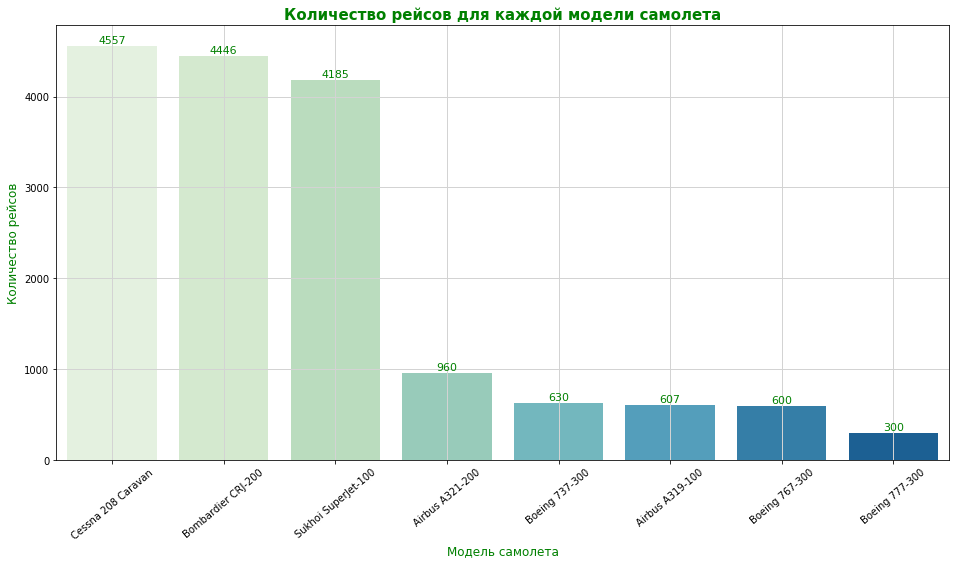

In [12]:
#основные параметры графика
plt.figure(figsize=(16,8))
ax = sns.barplot(x='model', y="flights_amount", data=df1.sort_values('flights_amount', ascending=False), 
                 palette=sns.color_palette("GnBu", 8))
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)

#подпись данных
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    ax.text(p.get_x() + p.get_width()/2., height, '%d' % int(height), 
        fontsize=11, color='green', ha='center', va='bottom')

#заголовок графика и подписи осей    
plt.title("Количество рейсов для каждой модели самолета", fontsize = 15, fontweight="bold", color='green')
plt.xlabel("Модель самолета", fontsize = 12, fontweight=500,color='green')
plt.ylabel('Количество рейсов', fontsize = 12, fontweight=500,color='green')
plt.xticks(rotation=40)
plt.show()

**Вывод**  

Чаще всего рейсы совершаются на небольших самолетах с наименьшей пассажировместимостью  и максимальной дальностью полета не более  
3 000 км. Так, в Cessna 208 Caravan количество пассажирских мест варьируется от 9 до 13, в Bombardier CRJ-200 количество мест составляет 50, а Sukhoi SuperJet-100 способен перевезти не более 98 пассажиров за раз. Вместимость авиалайнеров Airbus и Boeing колеблется от 124 до 550 мест в зависимости от модели и модификации, при этом расстояние, которое они способны преодолеть, превышает 4 000 км., а в случае с Boeing 737-300 максимальная дальность полета достигает 10 000 км.
Таким образом, небольшая частота полетов компенсируется числом перевезенных пассажиров и дальностью расстояния.

Источники характеристик самолетов: https://avia.pro/samolyoty-aviakompaniy, https://www.airlines-inform.ru/commercial-aircraft/

<a name="h4"></a>
### 4. Анализ связи между городами и количеством рейсов

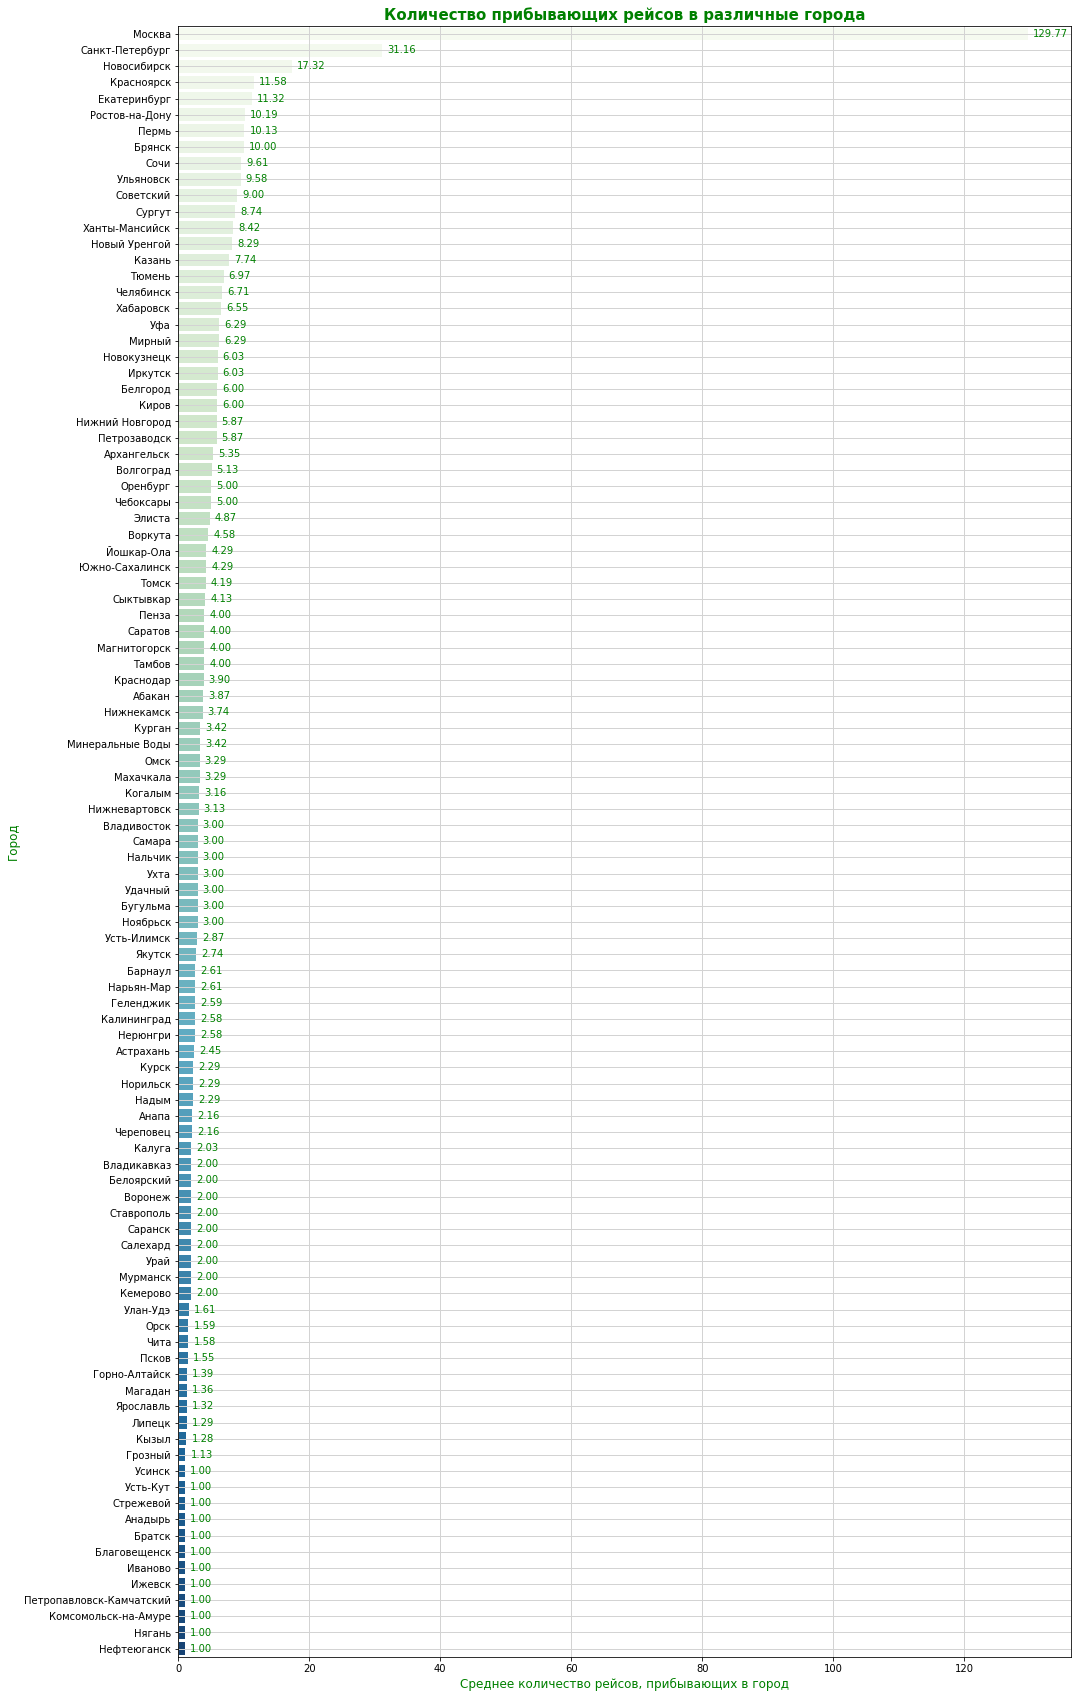

In [13]:
#основные параметры графика
plt.figure(figsize=(16,30))
ax = sns.barplot(y='city', x="average_flights", data=df2.sort_values('average_flights', ascending=False), 
                 palette=sns.color_palette("GnBu", 101))
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)

#подпись данных
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center", color='green')

#заголовок графика и подписи осей    
plt.title("Количество прибывающих рейсов в различные города", fontsize = 15, fontweight="bold", color='green')
plt.ylabel('Город', fontsize = 12, fontweight=500,color='green')
plt.xlabel('Среднее количество рейсов, прибывающих в город', fontsize = 12, fontweight=500,color='green')
plt.show()

In [14]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.49,13.12,1.0,2.0,3.0,5.87,129.77


**Вывод**  

Первое место среди городов по количеству прибывающих рейсов ожидаемо занимает Москва. В среднем за день в августе 2018 года прибывало почти 128 самолетов, что в 4 раза превышает аналогичный показатель для Санкт-Петербурга, находящегося на втором месте. Популярность данного направления обусловлена как федеральным значением города, численностью населения и туристской привлекательностью столицы, так и наличием нескольких аэропортов способных справиться с таким большим пассажиропотоком. Кроме того, московский авиационный узел играет важнейшую роль для воздушного транспорта России и СНГ.  
Что касается регионов, то в 75% рассматриваемых городов количество прибывающих рейсов в день не превышало 6, при этом с удаленностью от столицы снижается трафик. Также наличие более крупных аэропортов в регионе снижает авиапоток небольших городов (например, Краснодар и Анапа, Казань и Нижнекамск, Сыктывкар и Ухта).

<a name="h5"></a>
### 5. Анализ топ-10 городов по количеству прибывающих рейсов

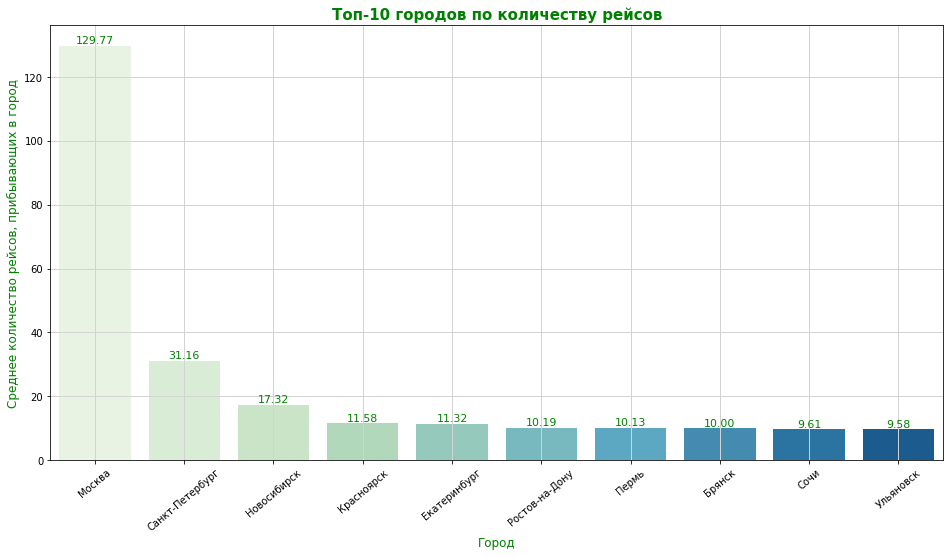

In [15]:
#основные параметры графика
plt.figure(figsize=(16,8))
ax = sns.barplot(x='city', y="average_flights", data=top_city, palette=sns.color_palette("GnBu", 10))
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)

#подпись данных
for p in ax.patches:
    height = p.get_height()
    if np.isnan(height):
        height = 0
    ax.text(p.get_x() + p.get_width()/2., height, '{:.2f}'.format(p.get_height()), 
        fontsize=11, color='green', ha='center', va='bottom')
    
#заголовок графика и подписи осей     
plt.title("Топ-10 городов по количеству рейсов", fontsize = 15, fontweight="bold", color='green')
plt.xlabel('Город', fontsize = 12, fontweight=500,color='green')
plt.ylabel('Среднее количество рейсов, прибывающих в город', fontsize = 12, fontweight=500,color='green')
plt.xticks(rotation=40)
plt.show()

**Вывод**  

Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону и Пермь входят в топ-15 крупнейших городов России по численности населения по состоянию на 01.01.2019, поэтому нет ничего удивительного в том, что на них приходится основной авиапоток. Сочи является наиболее востребованным курортом в России, чем объясняется высокий спрос на это направление в сезон отпусков. Присутствие Брянска и Ульяновска в рейтинге наиболее популярных городов России по количеству рейсов выглядит неожиданным. Возможно, частично это обусловлено тем, что аэропорты, расположенные в данных городах, имеют международный статус, а также – федеральное значение. Кроме того, аэропорт Брянска также является входными и выходными «воротами» для юго-западных воздушных трасс. 

<a name="h6"></a>
### 6. Вывод

В ходе исследования были проанализированы данные об авиаперевозках в период проведения фестивалей. По предварительным результатам во время московских фестивалей спрос на билеты в Москву практически не меняется, скорее всего это объясняется тем, что обычный авиатрафик столицы слишком большой, чтобы посетители оказали на него существенное влияние. Кроме того, часть участников составляют сами москвичи либо жители ближайших регионов, которые предпочитают наземный транспорт.  
Также в целом были изучены модели самолетов и частота их эксплуатации. Было выявлено, что количество полетов обратно пропорционально вместимости самолетов и дальности полетов. Что касается популярности направлений, то она в первую очередь определяется численностью населения города, его статусом и туристкой или курортной привлекатательностью региона, поэтому при принятии решения о расширении деятельности необходимо руководствоваться данными критериями.